In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
file_path = '/Volumes/Transcend/HackNtu_2017/Security/Raw Data/TBrain_IPS.csv'
Tbrain = pd.read_csv(file_path)

In [5]:
Tbrain.head()

,device_dev_name,device_family_name,device_hashed_mac,device_os_name,device_type_name,device_vendor_name,event_protocol_id,event_flow_outbound_or_inbound,event_role_device_or_router,event_role_server_or_client,event_rule_category,event_rule_id,event_rule_name,event_rule_reference,event_rule_severity,event_self_ipv4,event_time,router_ip
0,Windows,Computer,c589f89e814a5fda2c5ff061b0e9b283db057b1b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.243,12/21/2016 3:01:29 AM,207.124.221.172
1,Windows,Computer,c589f89e814a5fda2c5ff061b0e9b283db057b1b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.243,12/21/2016 3:01:29 AM,207.124.221.172
2,Windows,Computer,c589f89e814a5fda2c5ff061b0e9b283db057b1b,Windows,Desktop/Laptop,Microsoft Corp.,6,outbound,device,client,Access Control,1050015,WEB Cross-site Scripting -34,CVE-2011-2133; CVE-2014-4116,4,192.168.2.243,12/21/2016 3:01:29 AM,207.124.221.172
3,NaN,NaN,2d896d888f3b998e911ee97802daab0dd923e7aa,NaN,NaN,NaN,6,outbound,device,server,Web Attack,1050700,WEB Cross-site Scripting (document.cookie) att...,CVE-2012-0007; CVE-2012-0010; CVE-2012-1861; C...,5,200.223.65.226,12/12/2016 7:05:00 AM,201.97.175.59
4,NaN,NaN,2d896d888f3b998e911ee97802daab0dd923e7aa,NaN,NaN,NaN,6,outbound,device,server,Web Attack,1050700,WEB Cross-site Scripting (document.cookie) att...,CVE-2012-0007; CVE-2012-0010; CVE-2012-1861; C...,5,15.58.51.255,12/12/2016 7:52:24 AM,201.97.175.59


                         index  device_family_name
0                     Computer              369401
1                     Handheld               24787
2                 Game Console                7424
3         Network & Peripheral                6855
4  Intelligent Home Appliances                3890
5      Smart TV &  Set-top box                1071
6             Wearable devices                  74


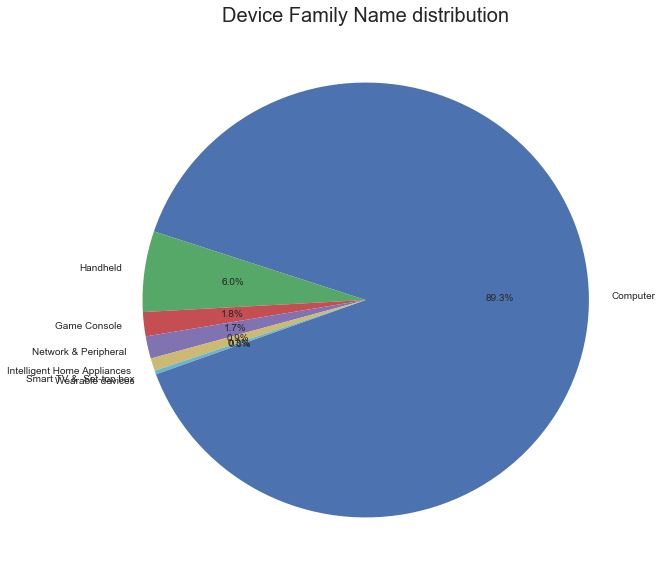

In [61]:
# Device 名稱
print (Tbrain['device_family_name'].value_counts().reset_index()) # event_rule_reference: 可以去mapping 國網中心
plt.figure(figsize=(10,10))
temp_series = Tbrain['device_family_name'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Device Family Name distribution", fontsize=20) # 裝置名稱使用比例圖
plt.show()


In [57]:
# 作業名稱
Tbrain['device_os_name'].value_counts().reset_index() # operation system name, device_type_name: 有25種

,index,device_os_name
0,Windows,290395
1,Apple iOS,232229
2,Linux,95190
3,Android,81310
4,Mac OS X,69767
5,Windows 7,34835
6,Windows 8/10,19593
7,Android 4.2-5.1,18396
8,Ubuntu,15442
9,Others,14662


In [58]:
# 廠商名稱
Tbrain['device_vendor_name'].value_counts().reset_index()

,index,device_vendor_name
0,Microsoft Corp.,352580
1,Apple Inc.,289519
2,Synology Inc.,87356
3,Samsung Group,49224
4,Google Inc.,37101
5,Ubuntu,19708
6,Others,7412
7,Xiaomi Inc.,5811
8,Sony Corporation,3886
9,HTC Corporation,3876


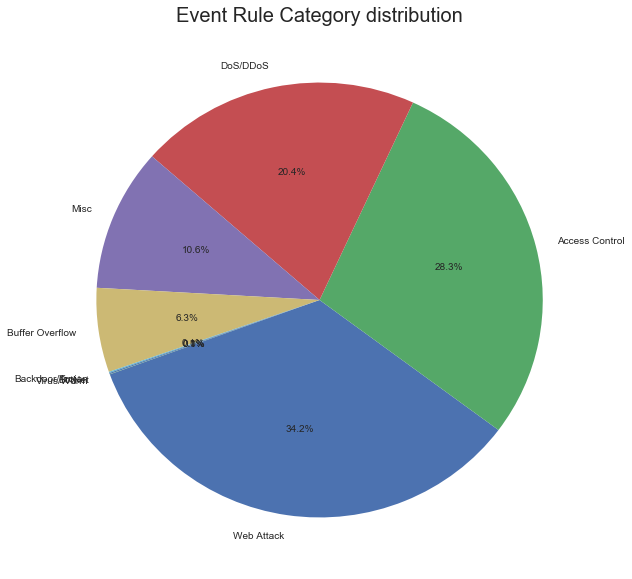

In [20]:
# 1. 發動攻擊的類別
plt.figure(figsize=(10,10))
temp_series = Tbrain['event_rule_category'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Event Rule Category distribution", fontsize=20) # 發動攻擊的種類比例圖
plt.show()


4    737797
5    240758
3     23688
Name: event_rule_severity, dtype: int64


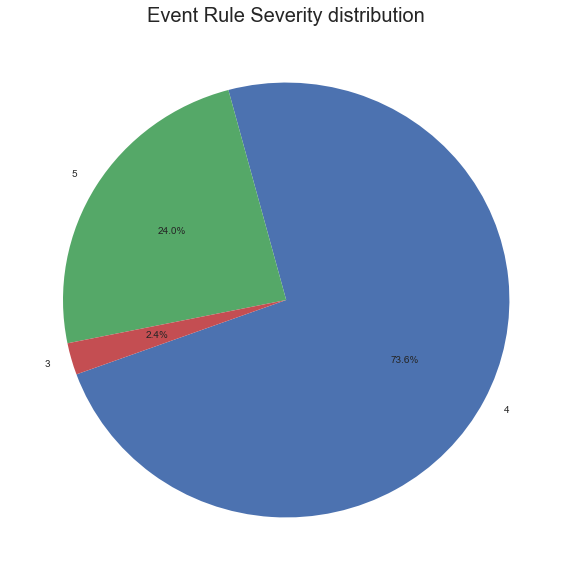

In [62]:
# 2. 發動攻擊的程度
plt.figure(figsize=(10,10))
temp_series = Tbrain['event_rule_severity'].value_counts()
print (temp_series)
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Event Rule Severity distribution", fontsize=20) # 攻擊的嚴重程度分佈圖
plt.show()
# to Customer: 什麼device 在什麼時段, 最安全。
# to Business: 預測在什麼event下, 可能是什麼category和severity 。

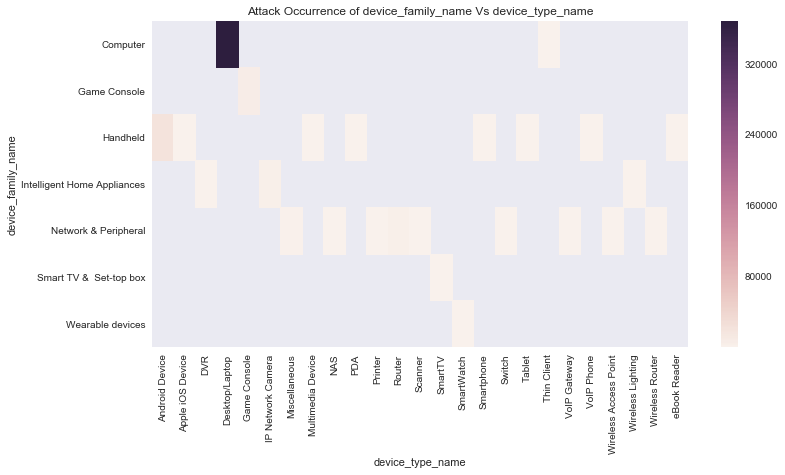

In [56]:
# 哪種裝置和哪種型別的的
grouped_df = Tbrain.groupby(["device_family_name", "device_type_name"])["event_rule_category"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('device_family_name', 'device_type_name', 'event_rule_category')
grouped_df
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Attack Occurrence of device_family_name Vs device_type_name") # 裝置名字和裝置型別, 攻擊的發生頻率。
plt.show()
# Looks like taht 裝置是電腦且型別是桌機被攻擊的次數相較於其他為最高.
# 再來就是手持的Android 裝置, 是第二種最容易發生攻擊的圖。



In [54]:
grouped_df = Tbrain.groupby(["device_family_name", "device_type_name"])["event_rule_category"]
for k, v in grouped_df:
    #print (k)
    if k == ('Computer', 'Desktop/Laptop'):
        print (v)
        print (v.aggregate("count"))

0          Access Control
1          Access Control
2          Access Control
14             Web Attack
15             Web Attack
16             Web Attack
17             Web Attack
18             Web Attack
19             Web Attack
20             Web Attack
21             Web Attack
22             Web Attack
23             Web Attack
24             Web Attack
25             Web Attack
26             Web Attack
27             Web Attack
28             Web Attack
29             Web Attack
30             Web Attack
31             Web Attack
32             Web Attack
33             Web Attack
34             Web Attack
35             Web Attack
36             Web Attack
37             Web Attack
38             Web Attack
39             Web Attack
40             Web Attack
                ...      
1002187    Access Control
1002188    Access Control
1002189    Access Control
1002190    Access Control
1002192              Misc
1002193              Misc
1002199        Web Attack
1002200     

In [ ]:
# device_vendor_name: 廠商名稱
# device_os_name: 作業系統
# 是最容易被攻擊的(inbound 和outbound)